## Obesity Prediction

## Library Installation

In [101]:
# !pip install catboost
# !pip install pandas-summary
# !pip install optuna
# !pip install pycaret
# !pip install --upgrade numpy scikit-learn pycaret

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.inspection import plot_partial_dependence
#from sklearn.metrics import classification_report, recall_score, plot_confusion_matrix, plot_precision_recall_curve, roc_curve
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
#import matplotlib as mlp
#from matplotlib import Artist
#from matplotlib.artist import Artist
#import seaborn as sns
import warnings
import optuna
from optuna.samplers import TPESampler
from tqdm import tqdm
from pycaret.classification import *

# Loading data from Google Drive

In [103]:
# from google.colab import drive
# drive.mount('/content/drive')

In [104]:
data = pd.read_csv('Obesity - Copy.csv')
data

AG        HT          WT   FH   FF   FV   NM         CM  \
0     21.000000  1.620000   64.000000  yes   no  2.0  3.0  Sometimes   
1     21.000000  1.520000   56.000000  yes   no  3.0  3.0  Sometimes   
2     23.000000  1.800000   77.000000  yes   no  2.0  3.0  Sometimes   
3     27.000000  1.800000   87.000000   no   no  3.0  3.0  Sometimes   
4     22.000000  1.780000   89.800000   no   no  2.0  1.0  Sometimes   
...         ...       ...         ...  ...  ...  ...  ...        ...   
2106  20.976842  1.710730  131.408528  yes  yes  3.0  3.0  Sometimes   
2107  21.982942  1.748584  133.742943  yes  yes  3.0  3.0  Sometimes   
2108  22.524036  1.752206  133.689352  yes  yes  3.0  3.0  Sometimes   
2109  24.361936  1.739450  133.346641  yes  yes  3.0  3.0  Sometimes   
2110  23.664709  1.738836  133.472641  yes  yes  3.0  3.0  Sometimes   

            CW        FA        TD          CA                     TU  \
0     2.000000  0.000000  1.000000          no  Public_Transportation   
1     3.000000  3.000000  0.000000   Sometimes  Public_Transportation   
2     2.000000  2.000000  1.000000  Frequently  Public_Transportation   
3     2.000000  2.000000  0.000000  Frequently                Walking   
4     2.000000  0.000000  0.000000   Sometimes  Public_Transportation   
...        ...       ...       ...         ...                    ...   
2106  1.728139  1.676269  0.906247   Sometimes  Public_Transportation   
2107  2.005130  1.341390  0.599270   Sometimes  Public_Transportation   
2108  2.054193  1.414209  0.646288   Sometimes  Public_Transportation   
2109  2.852339  1.139107  0.586035   Sometimes  Public_Transportation   
2110  2.863513  1.026452  0.714137   Sometimes  Public_Transportation   

                       OB  
0           Normal_Weight  
1           Normal_Weight  
2           Normal_Weight  
3      Overweight_Level_I  
4     Overweight_Level_II  
...                   ...  
2106     Obesity_Type_III  
2107     Obesity_Type_III  
2108     Obesity_Type_III  
2109     Obesity_Type_III  
2110     Obesity_Type_III  

[2111 rows x 14 columns]

# Dataset Description

In [105]:
data.shape

(2111, 14)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AG      2111 non-null   float64
 1   HT      2111 non-null   float64
 2   WT      2111 non-null   float64
 3   FH      2111 non-null   object 
 4   FF      2111 non-null   object 
 5   FV      2111 non-null   float64
 6   NM      2111 non-null   float64
 7   CM      2111 non-null   object 
 8   CW      2111 non-null   float64
 9   FA      2111 non-null   float64
 10  TD      2111 non-null   float64
 11  CA      2111 non-null   object 
 12  TU      2111 non-null   object 
 13  OB      2111 non-null   object 
dtypes: float64(8), object(6)
memory usage: 231.0+ KB


In [107]:
data.describe()

AG           HT           WT           FV           NM  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

                CW           FA           TD  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [108]:
data.isnull().sum()

AG    0
HT    0
WT    0
FH    0
FF    0
FV    0
NM    0
CM    0
CW    0
FA    0
TD    0
CA    0
TU    0
OB    0
dtype: int64

No Null values found.

# Performing Cramer's V and Chi-Squared Test for find out the influence of Independent categorical variables on the depended variabl (OB).

In [109]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np

In [110]:
categorical_cols = ["FH", "FF", "CM", "CA", "TU"]

In [111]:
# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

    # Perform Cramer's V and Chi-squared tests
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data["OB"])

    # Calculate Cramer's V
    cramers = cramers_v(data[col], data["OB"])

    print(f"--- {col} vs OB ---")
    print(f"Cramer's V: {cramers}")

--- FH vs OB ---
Cramer's V: 0.5403074121245424
--- FF vs OB ---
Cramer's V: 0.3282428524018662
--- CM vs OB ---
Cramer's V: 0.35231440455622254
--- CA vs OB ---
Cramer's V: 0.22514638070103762
--- TU vs OB ---
Cramer's V: 0.1785158768663847


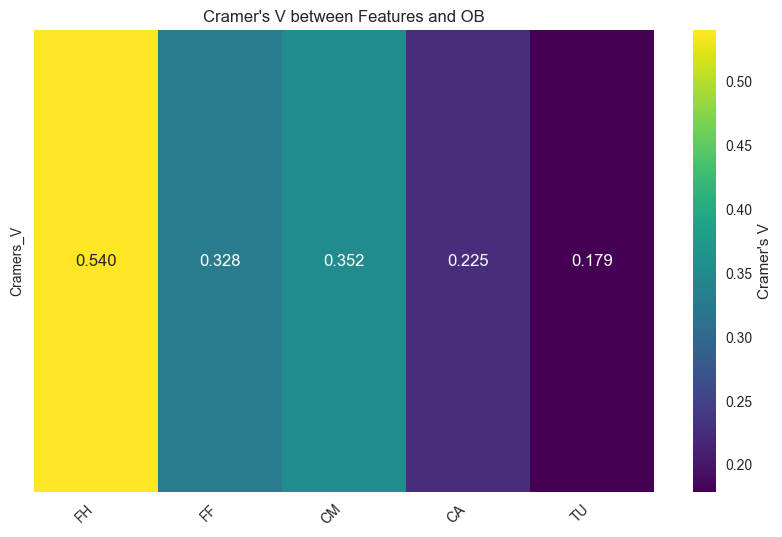

In [112]:
cramers_v_results = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data["OB"])

    # Calculate Cramer's V
    cramers = cramers_v(data[col], data["OB"])
    cramers_v_results[col] = cramers

# Convert the dictionary to a DataFrame
cramers_df = pd.DataFrame(list(cramers_v_results.items()), columns=['Feature', 'Cramers_V'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_df[['Cramers_V']].transpose(), annot=True, cmap='viridis', fmt=".3f",
            xticklabels=cramers_df['Feature'],
            cbar_kws={'label': 'Cramer\'s V'})
plt.title('Cramer\'s V between Features and OB')
plt.xticks(rotation=45, ha='right')
plt.show()

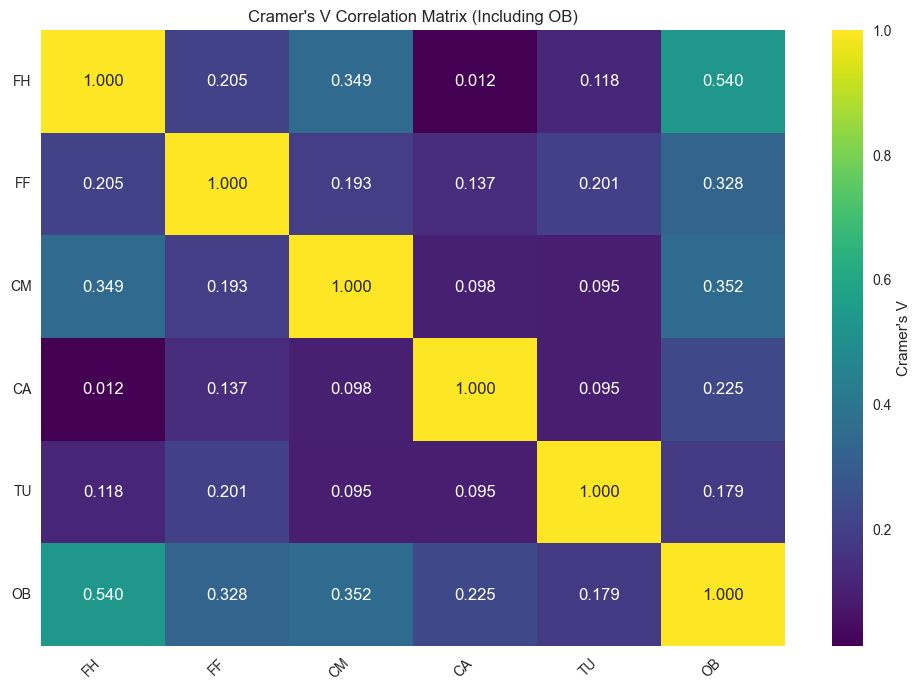

In [113]:
cramers_v_results = {}
for col in categorical_cols:
    cramers_v_results[col] = cramers_v(data[col], data["OB"])

cramers_df = pd.DataFrame(list(cramers_v_results.items()), columns=['Feature', 'Cramers_V'])

all_categorical_cols = categorical_cols + ['OB']

# Create an empty matrix for Cramer's V values
num_features = len(all_categorical_cols)
cramers_matrix = np.ones((num_features, num_features))

# Calculate Cramer's V for all pairs, including 'OB'
for i in range(num_features):
    for j in range(i + 1, num_features):
        cramers_matrix[i, j] = cramers_matrix[j, i] = cramers_v(data[all_categorical_cols[i]], data[all_categorical_cols[j]])

cramers_matrix_df = pd.DataFrame(cramers_matrix, index=all_categorical_cols, columns=all_categorical_cols)

plt.figure(figsize=(12, 8))
sns.heatmap(cramers_matrix_df, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Cramer\'s V'})
plt.title('Cramer\'s V Correlation Matrix (Including OB)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [114]:
# Perform tests for each feature
for feature in categorical_cols:
    # Chi-squared test
    contingency_table = pd.crosstab(data[feature], data['OB'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {feature} vs. OB:")
    print(f"  Chi2 Statistic: {chi2_stat:.3f}")
    print(f"  P-value: {p_value:.3f}")

    # Cramer's V (if association is significant)
    if p_value < 0.05:  # Adjust significance level as needed
        v = cramers_v(data[feature], data['OB'])
        print(f"  Cramer's V: {v:.3f}")
    print("-" * 30)  # Separator for clarity

Chi-squared test for FH vs. OB:
  Chi2 Statistic: 621.979
  P-value: 0.000
  Cramer's V: 0.540
------------------------------
Chi-squared test for FF vs. OB:
  Chi2 Statistic: 233.341
  P-value: 0.000
  Cramer's V: 0.328
------------------------------
Chi-squared test for CM vs. OB:
  Chi2 Statistic: 802.977
  P-value: 0.000
  Cramer's V: 0.352
------------------------------
Chi-squared test for CA vs. OB:
  Chi2 Statistic: 338.578
  P-value: 0.000
  Cramer's V: 0.225
------------------------------
Chi-squared test for TU vs. OB:
  Chi2 Statistic: 292.594
  P-value: 0.000
  Cramer's V: 0.179
------------------------------


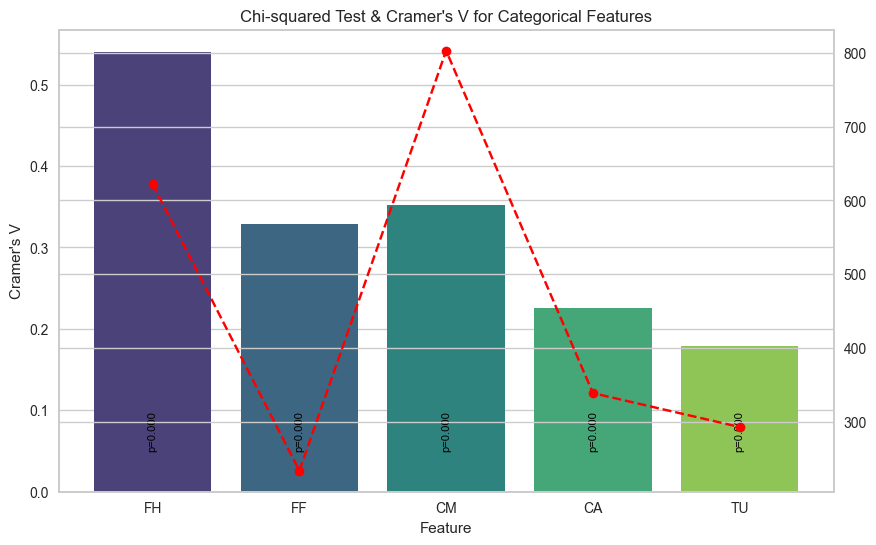

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

results = []
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data["OB"])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    cramers = cramers_v(data[col], data["OB"])
    results.append([col, chi2_stat, p_value, cramers])

results_df = pd.DataFrame(results, columns=['Feature', 'Chi2 Statistic', 'P-value', "Cramer's V"])

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Feature', y="Cramer's V", data=results_df, palette="viridis")
ax2 = ax.twinx()
ax2.plot(results_df['Feature'], results_df['Chi2 Statistic'], color='red', marker='o', linestyle='--')


plt.title('Chi-squared Test & Cramer\'s V for Categorical Features')
plt.xticks(rotation=45, ha='right')

# Annotate with p-values
for i, p in enumerate(results_df['P-value']):
  ax.text(i, 0.05, f"p={p:.3f}", ha='center', va='bottom', rotation=90, fontsize=8, color="black")

plt.show()

The red line denotes Chi Squared Test

# Finding distinct values in categorical data to label encode them.

In [116]:
# Identify categorical features and their distinct values for label encoding
categorical_features = data.select_dtypes(include=['object']).columns
for col in categorical_features:
    distinct_values = data[col].unique()
    print(f"Feature: {col}")
    print(f"  Number of distinct values: {len(distinct_values)}")
    print(f"  Distinct values: {distinct_values}")

Feature: FH
  Number of distinct values: 2
  Distinct values: ['yes' 'no']
Feature: FF
  Number of distinct values: 2
  Distinct values: ['no' 'yes']
Feature: CM
  Number of distinct values: 4
  Distinct values: ['Sometimes' 'Frequently' 'Always' 'no']
Feature: CA
  Number of distinct values: 4
  Distinct values: ['no' 'Sometimes' 'Frequently' 'Always']
Feature: TU
  Number of distinct values: 5
  Distinct values: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Feature: OB
  Number of distinct values: 7
  Distinct values: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [117]:
# Mapping for label encoding
label_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 4}
for feature in ['CM', 'CA']:
    data[feature] = data[feature].map(label_mapping)

In [118]:
# Mapping for label encoding 'TU'
label_mapping = {'Public_Transportation':1, 'Walking':0, 'Automobile':4,'Motorbike':2, 'Bike':3}
data['TU'] = data['TU'].map(label_mapping)

In [119]:
# Mapping for label encoding 'OB'
label_mapping = {'Normal_Weight': 1, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6,
                 'Obesity_Type_I': 2, 'Insufficient_Weight': 0, 'Obesity_Type_II': 3,
                 'Obesity_Type_III': 4}
data['OB'] = data['OB'].map(label_mapping)

In [120]:
data

AG        HT          WT   FH   FF   FV   NM  CM        CW  \
0     21.000000  1.620000   64.000000  yes   no  2.0  3.0   1  2.000000   
1     21.000000  1.520000   56.000000  yes   no  3.0  3.0   1  3.000000   
2     23.000000  1.800000   77.000000  yes   no  2.0  3.0   1  2.000000   
3     27.000000  1.800000   87.000000   no   no  3.0  3.0   1  2.000000   
4     22.000000  1.780000   89.800000   no   no  2.0  1.0   1  2.000000   
...         ...       ...         ...  ...  ...  ...  ...  ..       ...   
2106  20.976842  1.710730  131.408528  yes  yes  3.0  3.0   1  1.728139   
2107  21.982942  1.748584  133.742943  yes  yes  3.0  3.0   1  2.005130   
2108  22.524036  1.752206  133.689352  yes  yes  3.0  3.0   1  2.054193   
2109  24.361936  1.739450  133.346641  yes  yes  3.0  3.0   1  2.852339   
2110  23.664709  1.738836  133.472641  yes  yes  3.0  3.0   1  2.863513   

            FA        TD  CA  TU  OB  
0     0.000000  1.000000   0   1   1  
1     3.000000  0.000000   1   1   1  
2     2.000000  1.000000   2   1   1  
3     2.000000  0.000000   2   0   5  
4     0.000000  0.000000   1   1   6  
...        ...       ...  ..  ..  ..  
2106  1.676269  0.906247   1   1   4  
2107  1.341390  0.599270   1   1   4  
2108  1.414209  0.646288   1   1   4  
2109  1.139107  0.586035   1   1   4  
2110  1.026452  0.714137   1   1   4  

[2111 rows x 14 columns]

AG        Axes(0.125,0.77;0.168478x0.11)
HT     Axes(0.327174,0.77;0.168478x0.11)
WT     Axes(0.529348,0.77;0.168478x0.11)
FV     Axes(0.731522,0.77;0.168478x0.11)
NM       Axes(0.125,0.638;0.168478x0.11)
CM    Axes(0.327174,0.638;0.168478x0.11)
CW    Axes(0.529348,0.638;0.168478x0.11)
FA    Axes(0.731522,0.638;0.168478x0.11)
TD       Axes(0.125,0.506;0.168478x0.11)
CA    Axes(0.327174,0.506;0.168478x0.11)
TU    Axes(0.529348,0.506;0.168478x0.11)
OB    Axes(0.731522,0.506;0.168478x0.11)
dtype: object

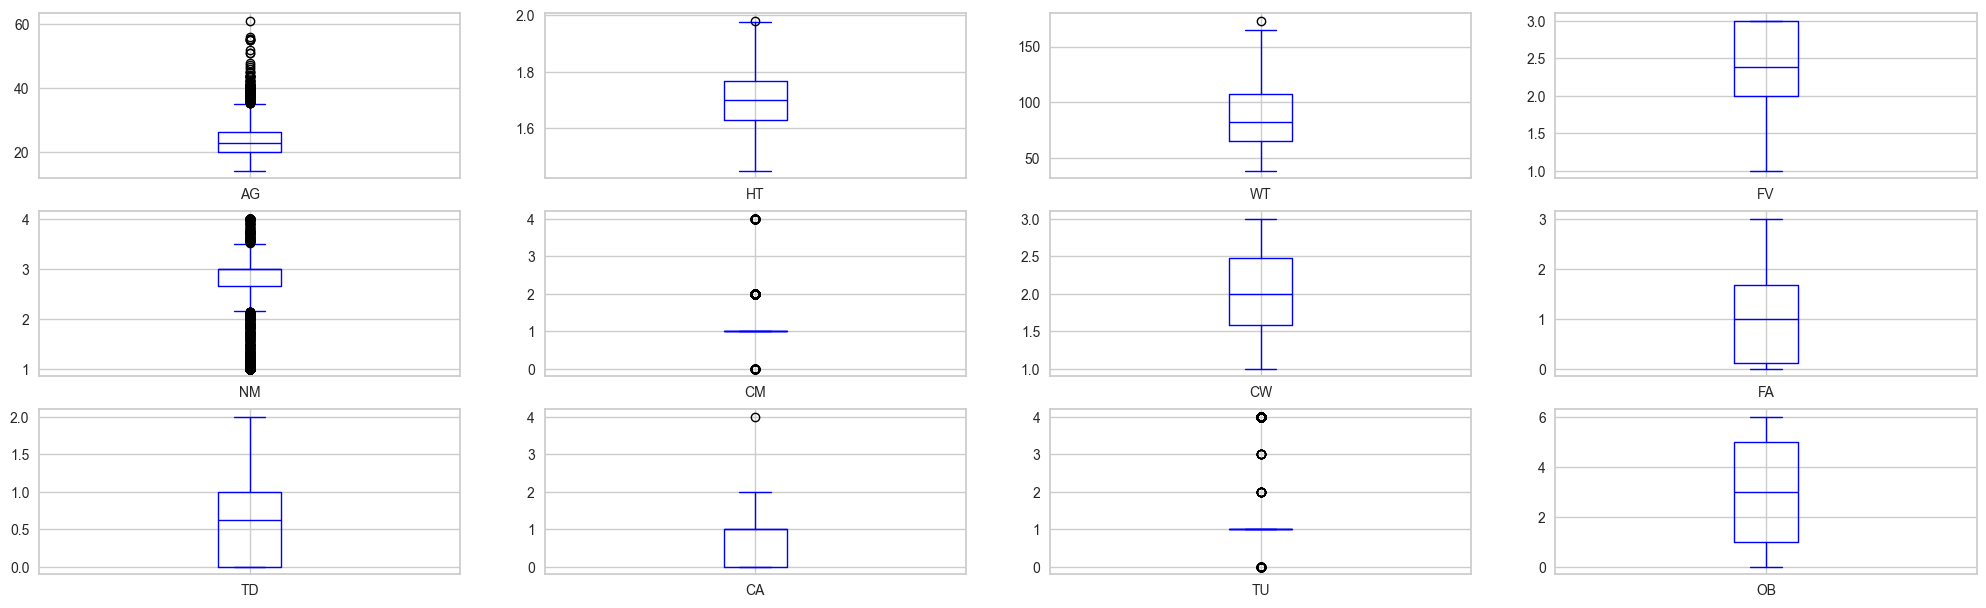

In [121]:
data.plot(color='blue', kind='box', figsize=(25, 15), subplots=True, layout=(6, 4))
#plt.show()

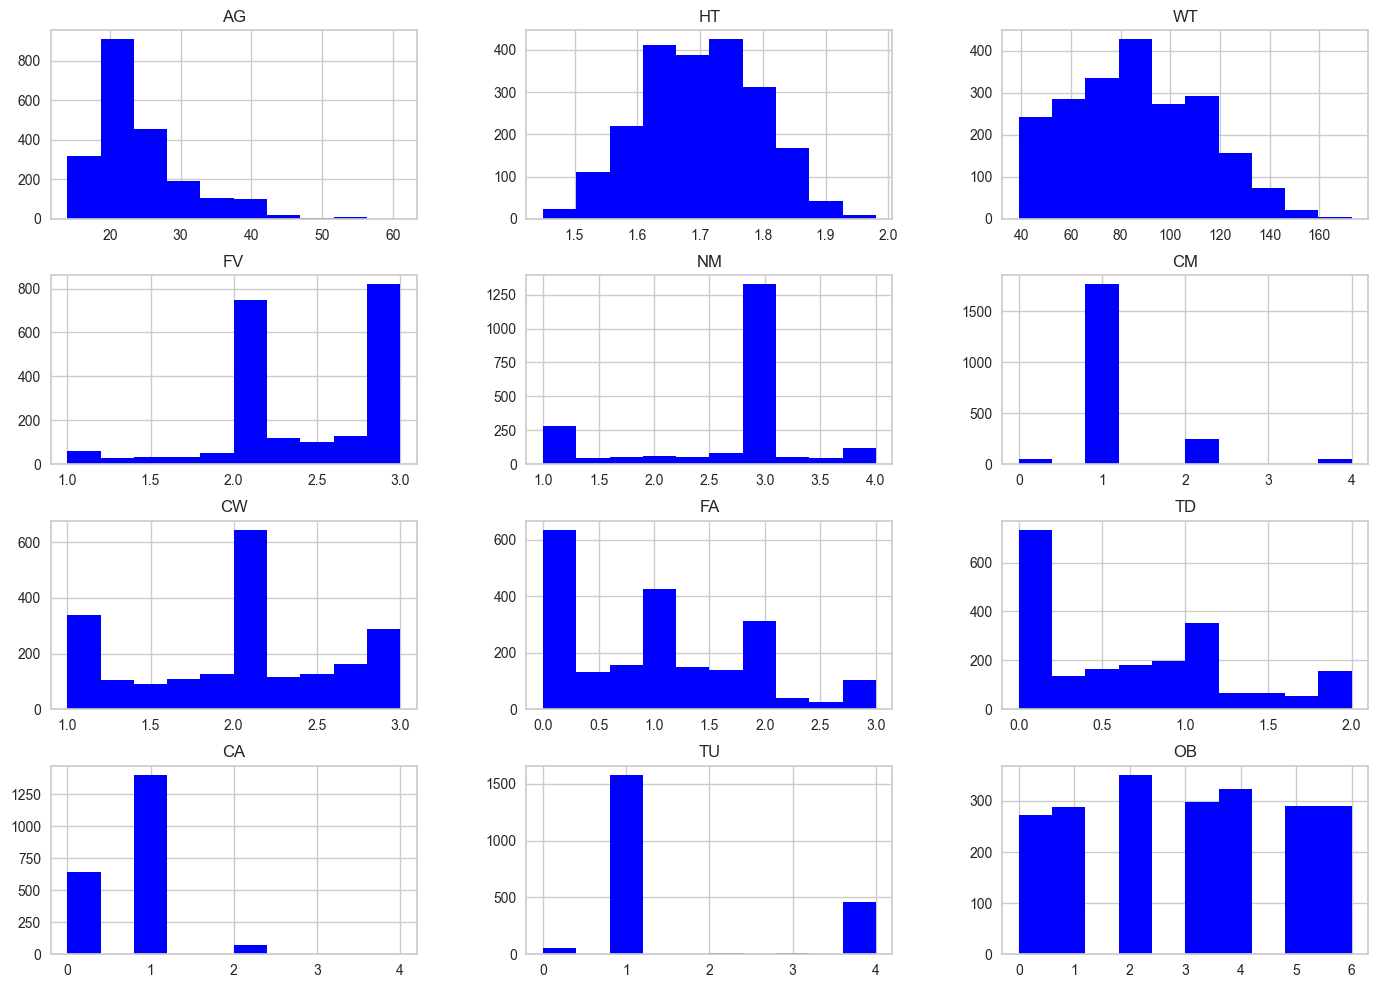

In [122]:
#histogram
data.hist(color='blue',bins=10,figsize=(17,12))
plt.show()

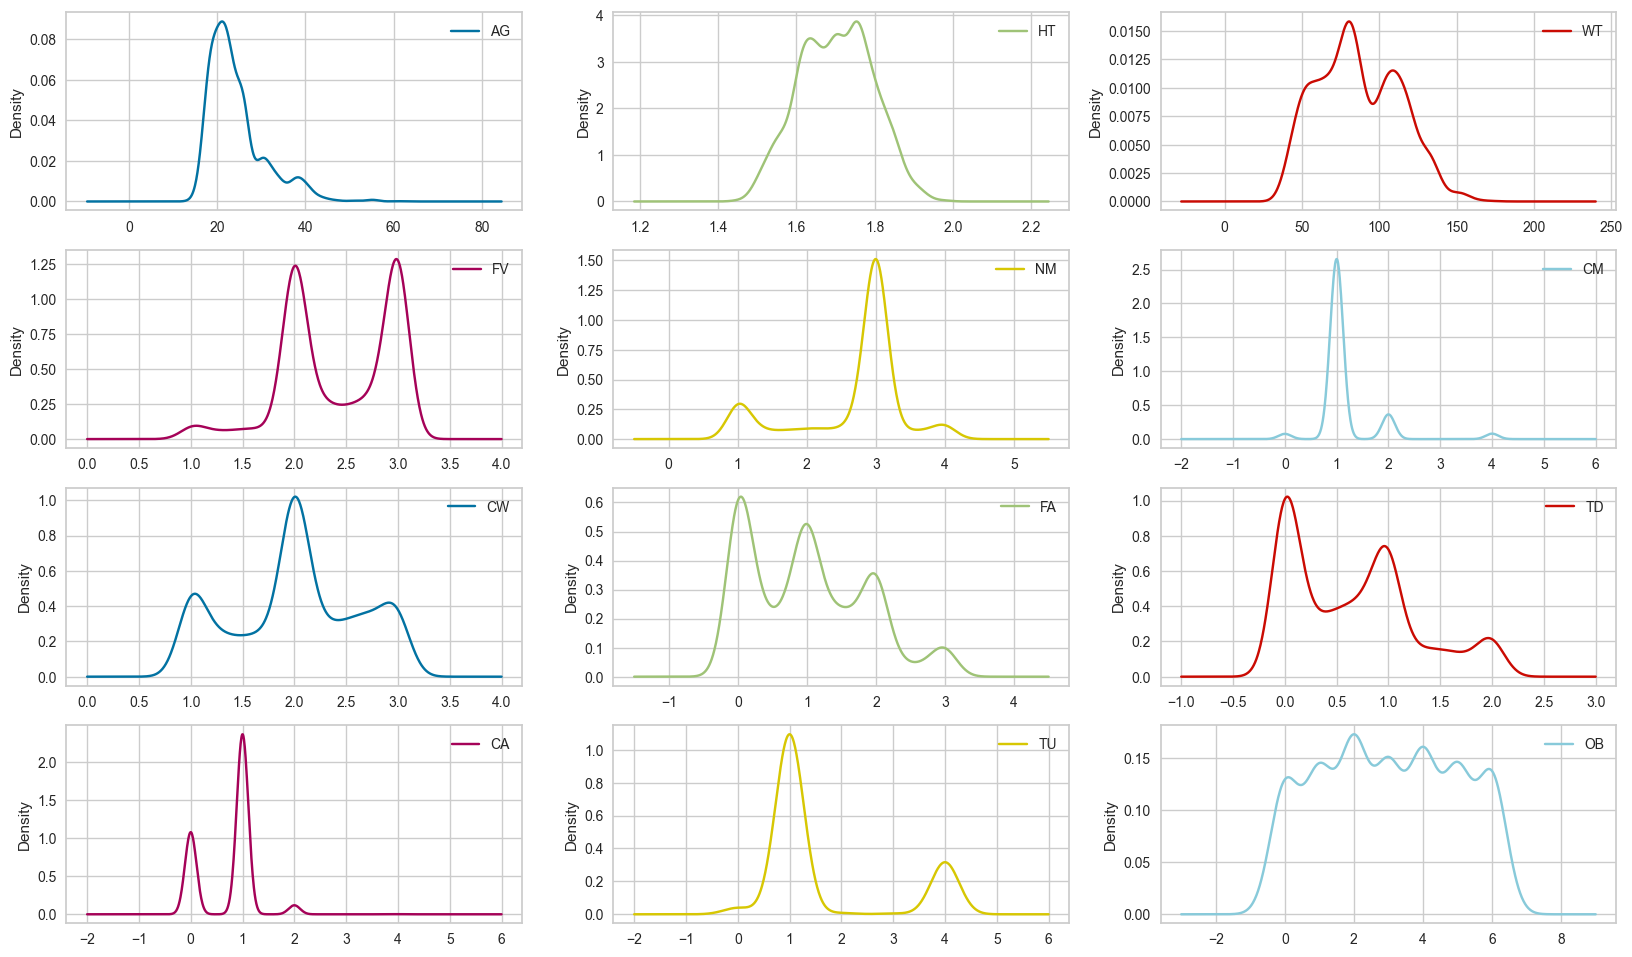

In [123]:
#Boxplot of each column
data.plot( kind='density', figsize=(20,18), subplots=True, layout=(6,3),sharex=False)
plt.show()

In [126]:
# #get correlations of each features in dataset
# corrmat = data.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(12,8))
# g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

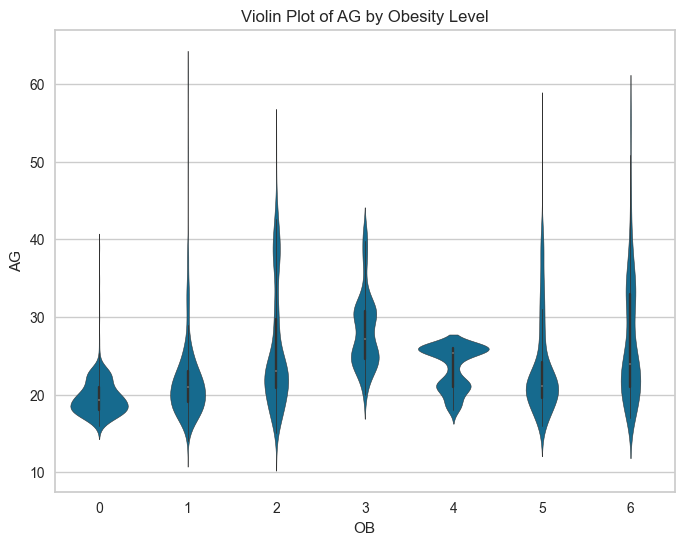

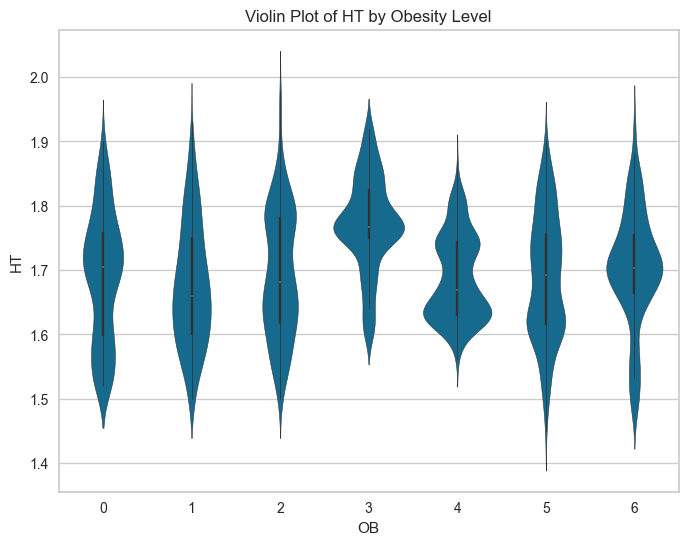

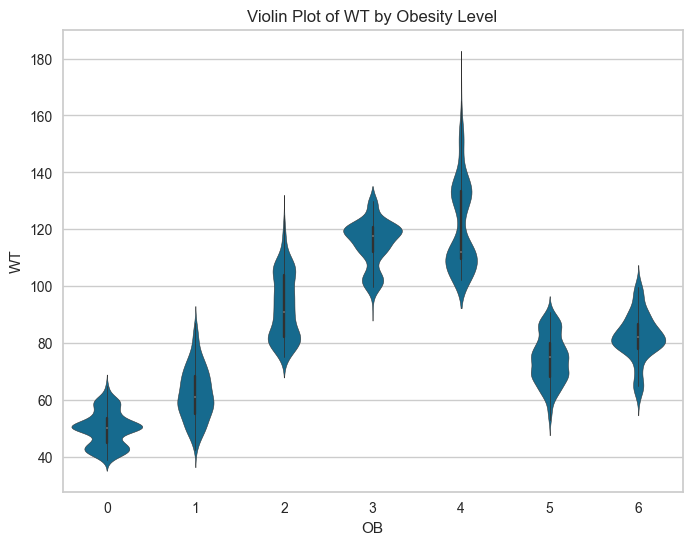

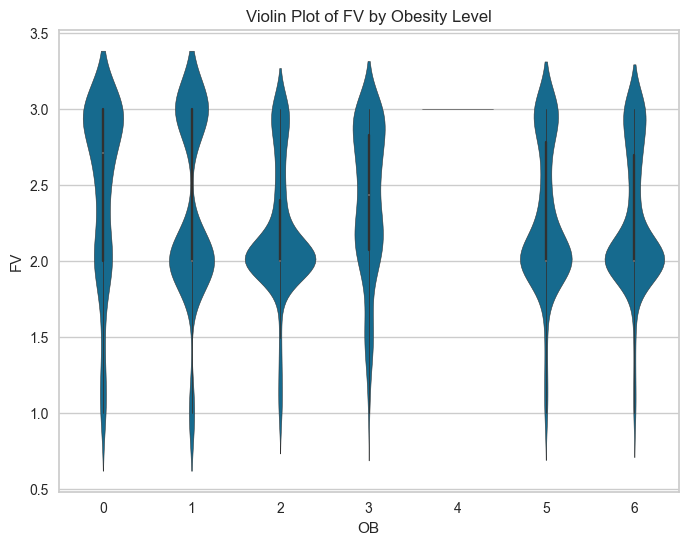

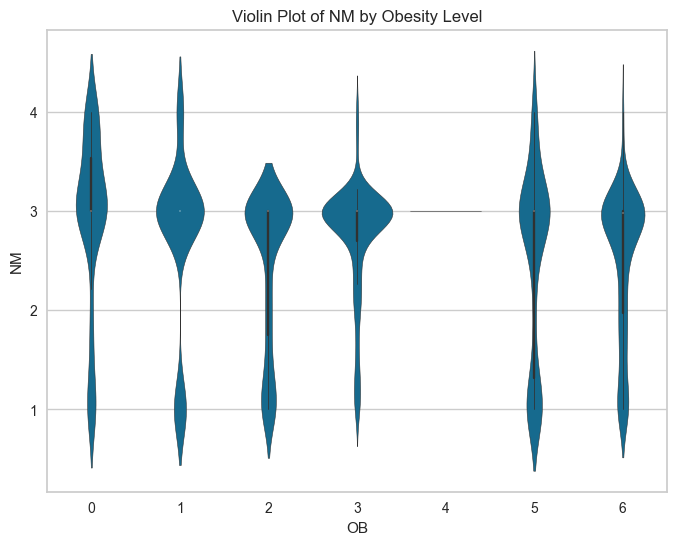

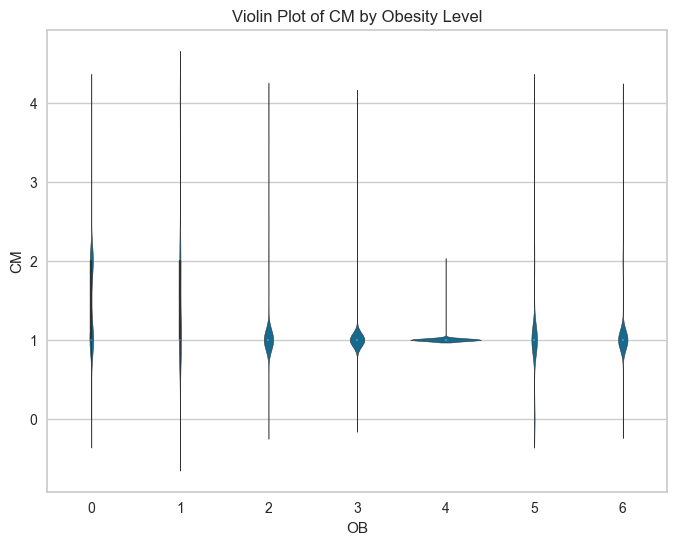

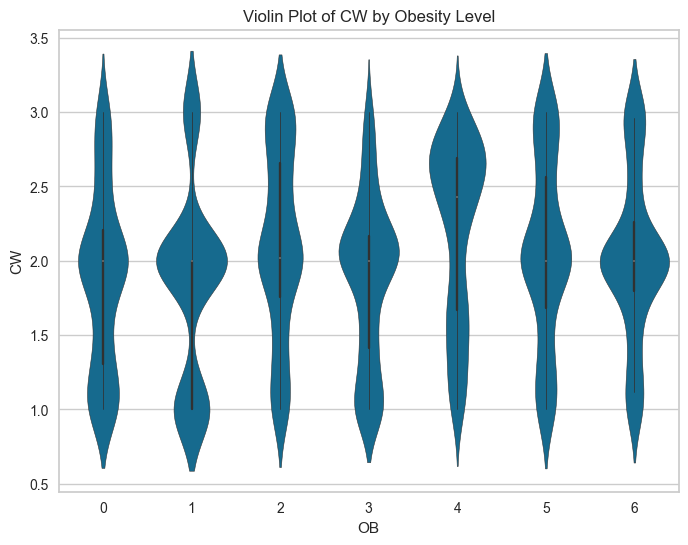

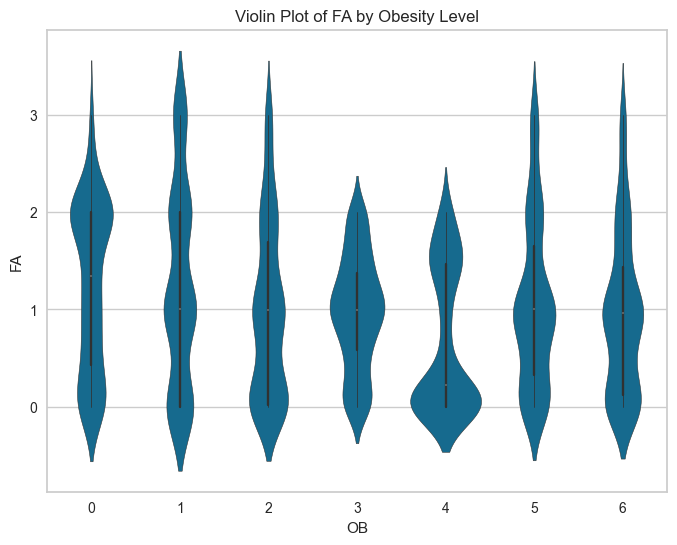

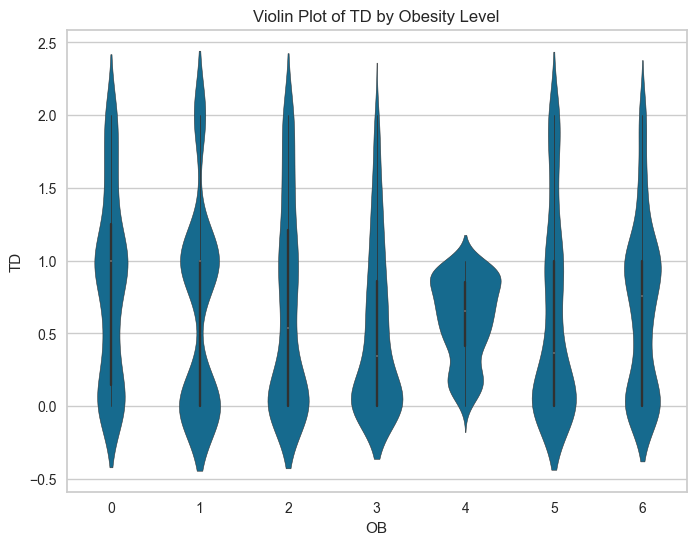

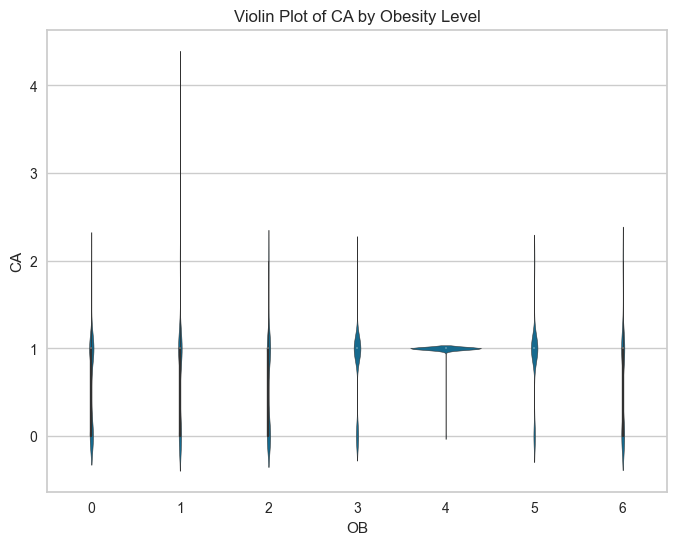

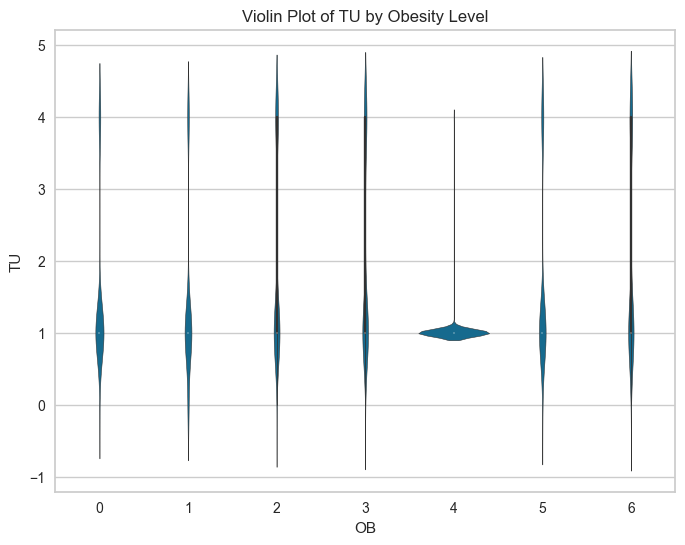

In [127]:
# Violin plots to show the distribution of numerical features for each obesity level
for col in data.select_dtypes(include=['number']).columns:
  if col != 'OB':  # Exclude the target variable itself
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='OB', y=col, data=data)
    plt.title(f'Violin Plot of {col} by Obesity Level')
    plt.show()

### Outliers handling using IQR method

In [128]:
#checking for the out layers with STD
print("Highest allowed",data['AG'].mean() + 3*data['AG'].std())
print("Lowest allowed",data['AG'].mean() - 3*data['AG'].std())

Highest allowed 43.35050472977086
Lowest allowed 5.274695087377413


In [129]:
#dealing with out layer values
data[(data['AG'] > 35) | (data['AG'] < 5.274)]

AG        HT          WT   FH   FF        FV        NM  CM  \
13    41.000000  1.800000   99.000000   no  yes  2.000000  3.000000   1   
21    52.000000  1.690000   87.000000  yes  yes  3.000000  1.000000   1   
33    39.000000  1.790000   90.000000   no   no  2.000000  1.000000   1   
92    55.000000  1.780000   84.000000  yes   no  3.000000  4.000000   2   
104   38.000000  1.560000   80.000000  yes  yes  2.000000  3.000000   1   
...         ...       ...         ...  ...  ...       ...       ...  ..   
1740  37.765356  1.763582  117.861590  yes  yes  2.145114  2.888193   1   
1775  37.207082  1.762921  118.401740  yes  yes  2.136830  2.993084   1   
1776  38.108940  1.752863  119.201465  yes  yes  2.499388  2.989791   1   
1777  38.644441  1.768235  117.792268  yes  yes  2.230742  2.920373   1   
1778  38.112989  1.766888  118.134898  yes  yes  2.240757  2.911568   1   

            CW        FA       TD  CA  TU  OB  
13    2.000000  2.000000  1.00000   2   4   2  
21    2.000000  0.000000  0.00000   0   4   2  
33    2.000000  0.000000  0.00000   1   1   6  
92    3.000000  3.000000  0.00000   2   0   5  
104   2.000000  0.000000  0.00000   1   4   2  
...        ...       ...      ...  ..  ..  ..  
1740  2.038128  0.852344  0.00000   1   4   3  
1775  1.885926  0.615298  0.00000   1   4   3  
1776  1.959777  0.608100  0.64676   1   4   3  
1777  1.831187  0.756277  0.00000   1   4   3  
1778  1.895876  0.822186  0.00000   1   4   3  

[168 rows x 14 columns]

In [130]:
new_df = data[(data['AG'] <35) & (data['AG'] >5.274)]
new_df

AG        HT          WT   FH   FF   FV   NM  CM        CW  \
0     21.000000  1.620000   64.000000  yes   no  2.0  3.0   1  2.000000   
1     21.000000  1.520000   56.000000  yes   no  3.0  3.0   1  3.000000   
2     23.000000  1.800000   77.000000  yes   no  2.0  3.0   1  2.000000   
3     27.000000  1.800000   87.000000   no   no  3.0  3.0   1  2.000000   
4     22.000000  1.780000   89.800000   no   no  2.0  1.0   1  2.000000   
...         ...       ...         ...  ...  ...  ...  ...  ..       ...   
2106  20.976842  1.710730  131.408528  yes  yes  3.0  3.0   1  1.728139   
2107  21.982942  1.748584  133.742943  yes  yes  3.0  3.0   1  2.005130   
2108  22.524036  1.752206  133.689352  yes  yes  3.0  3.0   1  2.054193   
2109  24.361936  1.739450  133.346641  yes  yes  3.0  3.0   1  2.852339   
2110  23.664709  1.738836  133.472641  yes  yes  3.0  3.0   1  2.863513   

            FA        TD  CA  TU  OB  
0     0.000000  1.000000   0   1   1  
1     3.000000  0.000000   1   1   1  
2     2.000000  1.000000   2   1   1  
3     2.000000  0.000000   2   0   5  
4     0.000000  0.000000   1   1   6  
...        ...       ...  ..  ..  ..  
2106  1.676269  0.906247   1   1   4  
2107  1.341390  0.599270   1   1   4  
2108  1.414209  0.646288   1   1   4  
2109  1.139107  0.586035   1   1   4  
2110  1.026452  0.714137   1   1   4  

[1940 rows x 14 columns]

In [131]:
#storing the values
upper_limit = data['AG'].mean() + 3*data['AG'].std()
lower_limit = data['AG'].mean() - 3*data['AG'].std()

In [132]:
data['AG'] = np.where(
    data['AG']>upper_limit,
    upper_limit,
    np.where(
        data['AG']<lower_limit,
        lower_limit,
        data['AG']
    )
)

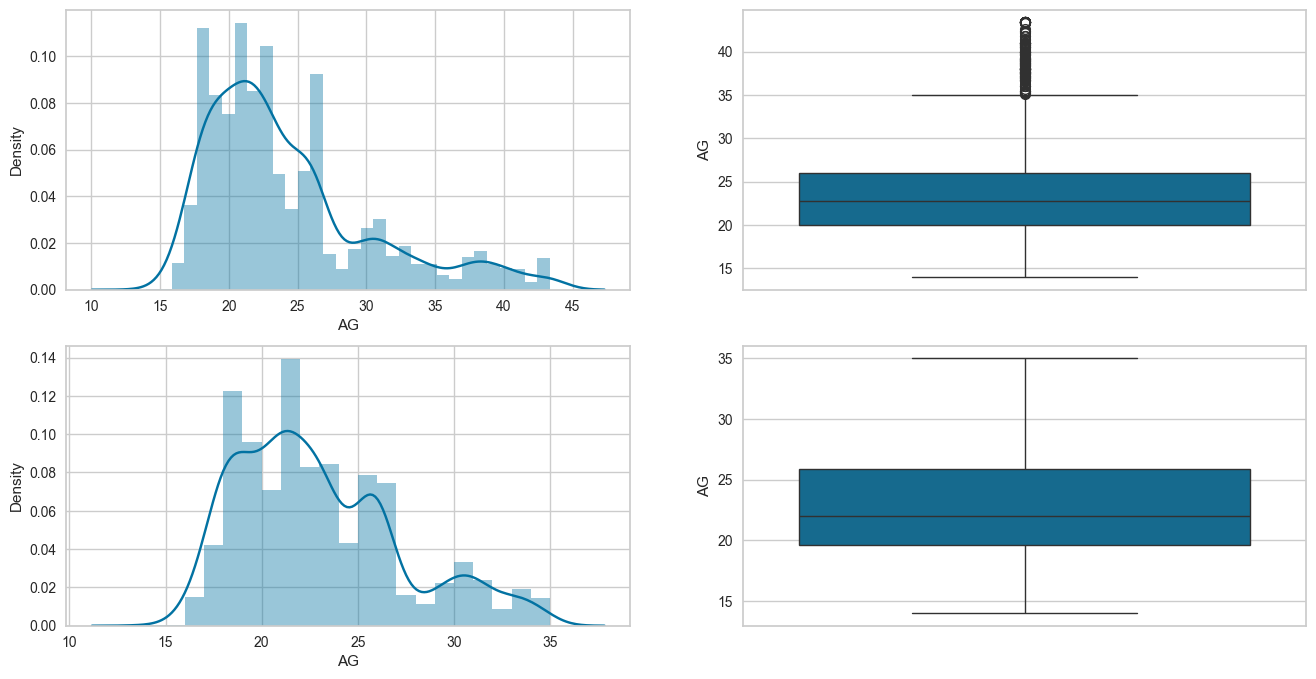

In [133]:
#ploting the outlayer removing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['AG'])
plt.subplot(2,2,2)
sns.boxplot(data['AG'])
plt.subplot(2,2,3)
sns.distplot(new_df['AG'])
plt.subplot(2,2,4)
sns.boxplot(new_df['AG'])
plt.show()

In [134]:
#checking for the out layers with STD
print("Highest allowed",data['NM'].mean() + 3*data['NM'].std())
print("Lowest allowed",data['NM'].mean() - 3*data['NM'].std())

Highest allowed 5.019743996265038
Lowest allowed 0.3515121032138815


In [135]:
#dealing with out layer values
data[(data['NM'] >3.5) | (data['NM'] < 1.664)]

AG        HT          WT   FH   FF        FV        NM  CM  \
4     22.000000  1.780000   89.800000   no   no  2.000000  1.000000   1   
14    23.000000  1.770000   60.000000  yes  yes  3.000000  1.000000   1   
16    27.000000  1.930000  102.000000  yes  yes  2.000000  1.000000   1   
17    29.000000  1.530000   78.000000   no  yes  2.000000  1.000000   1   
18    30.000000  1.710000   82.000000  yes  yes  3.000000  4.000000   2   
...         ...       ...         ...  ...  ...       ...       ...  ..   
1780  26.624342  1.690262  103.180918  yes  yes  2.649406  1.120102   1   
1795  20.068432  1.657132  105.580491  yes  yes  2.724121  1.437959   1   
1796  20.914366  1.644751  101.067988  yes  yes  2.801992  1.343117   1   
1797  25.512048  1.660761  104.321463  yes  yes  2.748971  1.213431   1   
1798  26.844812  1.691510  102.595180  yes  yes  2.680375  1.089048   1   

            CW        FA        TD  CA  TU  OB  
4     2.000000  0.000000  0.000000   1   1   6  
14    1.000000  1.000000  1.000000   1   1   1  
16    1.000000  1.000000  0.000000   1   1   6  
17    2.000000  0.000000  0.000000   0   4   2  
18    1.000000  0.000000  0.000000   0   4   6  
...        ...       ...       ...  ..  ..  ..  
1780  1.153286  0.216908  0.619012   0   1   3  
1795  1.590418  0.029603  1.122118   0   1   3  
1796  1.128942  0.233987  0.819980   0   1   3  
1797  1.448875  0.128548  1.239038   0   1   3  
1798  1.366238  0.181324  1.041677   0   1   3  

[485 rows x 14 columns]

In [136]:
new_df = data[(data['NM'] <2.2) & (data['NM'] >1.664)]
new_df

AG        HT          WT   FH   FF        FV        NM  CM  \
513   21.243142  1.598019   44.845655   no   no  3.000000  1.726260   2   
516   21.491055  1.586952   43.087508   no   no  2.008760  1.737620   2   
520   19.000000  1.556211   42.339767   no  yes  3.000000  2.084600   1   
521   19.000000  1.564199   42.096062   no  yes  3.000000  1.894384   1   
552   17.038222  1.710564   51.588874   no  yes  2.000000  2.057935   1   
...         ...       ...         ...  ...  ...       ...       ...  ..   
1781  33.722449  1.712905  103.276087  yes  yes  2.525884  2.040582   1   
1782  32.516469  1.695735  102.784864  yes  yes  2.736647  2.015675   1   
1791  24.001889  1.614075  100.245302  yes  yes  2.880483  1.703299   1   
1792  24.002404  1.609418  100.078367  yes  yes  2.885693  1.685134   1   
1794  30.642430  1.653876  102.583895  yes  yes  2.919526  2.142328   1   

            CW        FA        TD  CA  TU  OB  
513   2.444125  1.318170  0.000000   0   1   0  
516   1.792022  0.119643  0.000000   0   1   0  
520   2.137550  0.196152  0.062488   0   1   0  
521   2.456581  1.596576  0.997400   0   1   0  
552   2.371015  0.288032  0.714627   1   1   0  
...        ...       ...       ...  ..  ..  ..  
1781  1.000000  1.670360  0.023959   0   1   3  
1782  1.000000  1.977918  0.056351   0   1   3  
1791  1.006378  1.076729  1.058007   0   1   3  
1792  1.011849  0.503105  1.217929   0   1   3  
1794  1.175714  0.958555  0.636289   0   1   3  

[103 rows x 14 columns]

In [137]:
#storing the values
upper_limit = data['NM'].mean() + 3*data['NM'].std()
lower_limit = data['NM'].mean() - 3*data['NM'].std()

In [138]:
data['NM'] = np.where(
    data['NM']>upper_limit,
    upper_limit,
    np.where(
        data['NM']<lower_limit,
        lower_limit,
        data['NM']
    )
)

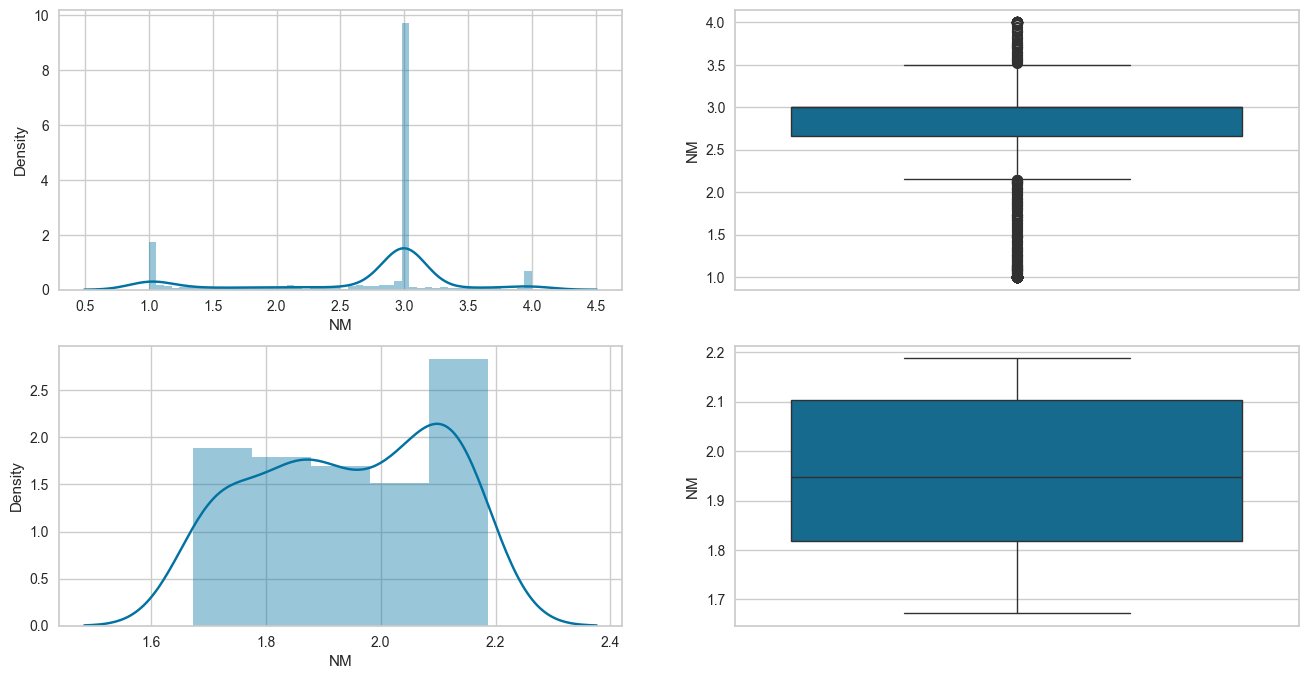

In [139]:
#ploting the outlayer removing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['NM'])
plt.subplot(2,2,2)
sns.boxplot(data['NM'])
plt.subplot(2,2,3)
sns.distplot(new_df['NM'])
plt.subplot(2,2,4)
sns.boxplot(new_df['NM'])
plt.show()

<Axes: >

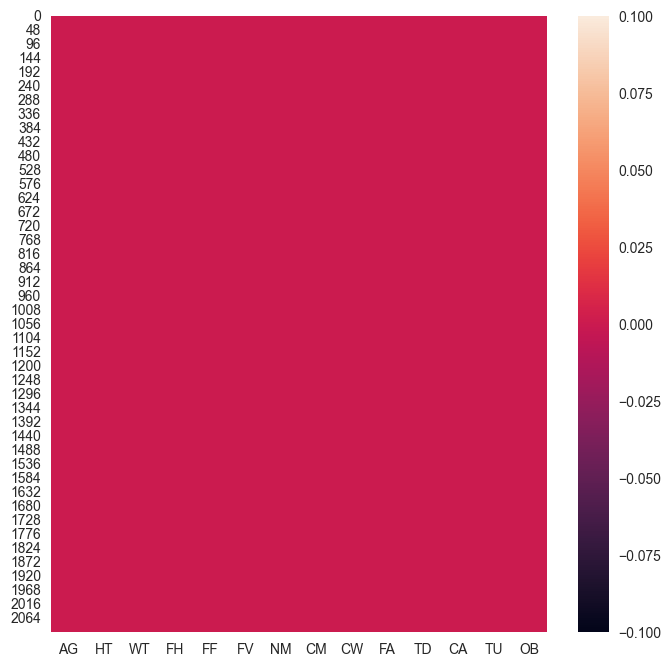

In [140]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

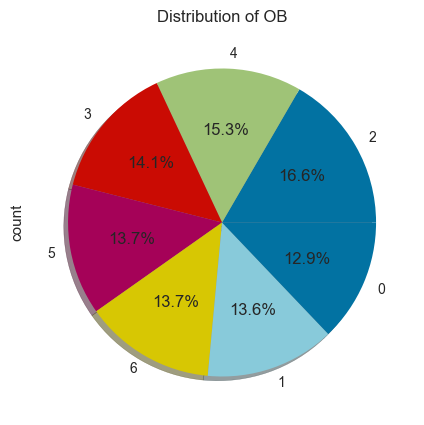

In [141]:
ob_series = pd.Series(data['OB'])
# Plot the pie chart
plt.figure(figsize=(15, 5))
data['OB'].value_counts().plot.pie(explode=None, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of OB')
plt.show()

In [142]:
#check the group by values
data['OB'].value_counts()

OB
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

In [145]:
# features_to_scale = [col for col in data.columns if col != 'OB']
# scaler = StandardScaler()
# data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [146]:
data.head()

AG    HT    WT   FH  FF   FV   NM  CM   CW   FA   TD  CA  TU  OB
0  21.0  1.62  64.0  yes  no  2.0  3.0   1  2.0  0.0  1.0   0   1   1
1  21.0  1.52  56.0  yes  no  3.0  3.0   1  3.0  3.0  0.0   1   1   1
2  23.0  1.80  77.0  yes  no  2.0  3.0   1  2.0  2.0  1.0   2   1   1
3  27.0  1.80  87.0   no  no  3.0  3.0   1  2.0  2.0  0.0   2   0   5
4  22.0  1.78  89.8   no  no  2.0  1.0   1  2.0  0.0  0.0   1   1   6

# Implementing PyCaret

In [41]:
numeric_features = [col for col in data.columns if data[col].dtype in [np.int64, np.float64] and col not in ['GD', 'OB']]
print(numeric_features)

['AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'CW', 'FA', 'TD', 'CA', 'TU']


In [43]:
from pycaret.classification import *
clf_setup = setup(data=data,
                  target='OB',
                  session_id=42,
                  preprocess=True,
                  normalize=True,
                  transformation=True,
                  numeric_features = numeric_features,
                  #categorical_features =  ['GD'],
                  index=False,
                  verbose=True)

In [44]:
print('comparing models for Obesity data and selecting top 5 out of them based on accuracy score')
top_model = compare_models(n_select = 5, sort='Accuracy')

comparing models for Obesity data and selecting top 5 out of them based on accuracy score


# Model ensembles

<br>


### 1. K-Fold Cross Validation

Stratified K-Fold Cross Validation is a technique used for evaluating a model. It is particularly useful for classification problems in which the class labels are not evenly distributed i.e data is imbalanced. It is a enhanced version of K-Fold Cross Validation. Key difference is that it uses stratification which allows original distribution of each class to be maintained across each fold. It is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
    * Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

**[Tip]** It is better to use `StratifiedKFold` when K-fold CV because it controls the percentage of each class of the target variable.  

<br>

<img 
     src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FluuGW%2FbtrgjGrj9g6%2FNOsrBEQIr2uTRynM2PZ3h1%2Fimg.png">
     
<br>


Source: https://scikit-learn.org/stable/modules/cross_validation.html, https://machinelearningmastery.com/k-fold-cross-validation/


<br><br>


### 2. Stacking

While bagging and boosting used homogenous weak learners for ensemble, Stacking often considers heterogeneous weak learners, learns them in parallel, and combines them by training a meta-learner to output a prediction based on the different weak learner’s predictions. A meta learner inputs the predictions as the features and the target being the ground truth values in data D(Fig 2.), it attempts to learn how to best combine the input predictions to make a better output prediction. 

A general approach for stacking is using meta model as Linear Regression (regression problem) or Logistic Regression (classification problem) to combine the predictions of the sub-models with any learning algorithm.

<br>

<img 
     src="https://editor.analyticsvidhya.com/uploads/39725Stacking.png">
     
<br>


source: https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

<br><br>

### Creating Meta Learners for Stacking

In [147]:
meta_learner1 = stack_models(estimator_list = [et, rf, catboost, xgboost, lightgbm], meta_model = KNeighborsClassifier())# Define meta learner
meta_learner2 = stack_models(estimator_list = [et, rf, catboost, xgboost, lightgbm], meta_model = LinearDiscriminantAnalysis())# Define meta learner
meta_learner3 = stack_models(estimator_list = [et, rf, catboost, xgboost, lightgbm], meta_model = LogisticRegression())# Define meta learner

In [148]:
evaluate_model(meta_learner1)
evaluate_model(meta_learner2)
evaluate_model(meta_learner3)

In [45]:
print("Top 5 Models are:")
for model in top_model:
  print(type(model).__name__)

Top 5 Models are:
LGBMClassifier
CatBoostClassifier
XGBClassifier
GradientBoostingClassifier
RandomForestClassifier


In [47]:
# Evaluate the stacker model
print(stacker)
evaluate_model(stacker)

StackingClassifier(cv=5,
                   estimators=[('Light Gradient Boosting Machine',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=42, reg_alpha=0.0,
                                               reg...
                                                 learning_

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [48]:
# Finalize the stacker model
final_stacker = finalize_model(stacker)
final_stacker

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['AG', 'HT', 'WT', 'FH', 'FF', 'FV',
                                             'NM', 'CM', 'CW', 'FA', 'TD', 'CA',
                                             'TU'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_impute...
                                                                  max_bin=None,
                                                                  max_cat_to_onehot=None,
                                                                  max_delta_step=None,
                                                                  max_depth=None,
                                                                  max_leaves=None,
                                                                  min_child_weight=None,
                                                                  missing=nan,
                                                                  monotone_constraints=None,
                                                                  n_estimators=100,
                                                                  n_jobs=None,
                                                                  num_parallel_tree=None,
                                                                  objective='binary:logistic',
                                                                  predictor=None,
                                                                  random_state=None,
                                                                  reg_alpha=None, ...),
                                    n_jobs=-1, passthrough=True,
                                    stack_method='auto', verbose=0))],
         verbose=False)

### RBM

In [160]:
stacking1 = stack_models(estimator_list = [svm, knn, dt, et, gbc, ada], meta_model = LogisticRegression(), fold=10, method='auto')

In [173]:
evaluate_model(stacking1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### BBM

In [46]:
# Create a stacked ensemble model
stacking2 = stack_models(estimator_list = [ada, gbc, dt, et, rf, lda], meta_model = LogisticRegression(), fold=10, method='auto')

In [172]:
evaluate_model(stacking2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Implementing SHAP XAI Shapley Additive exPlanations

In [49]:
import shap
shap.initjs()

In [50]:
X = data.drop('OB', axis=1)
y = data['OB']

In [51]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# Explain the model's predictions using SHAP
explainer = shap.Explainer(final_stacker.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 635it [17:12,  1.64s/it]                                                               


In [162]:
np.shape(shap_values.values)

(634, 13)

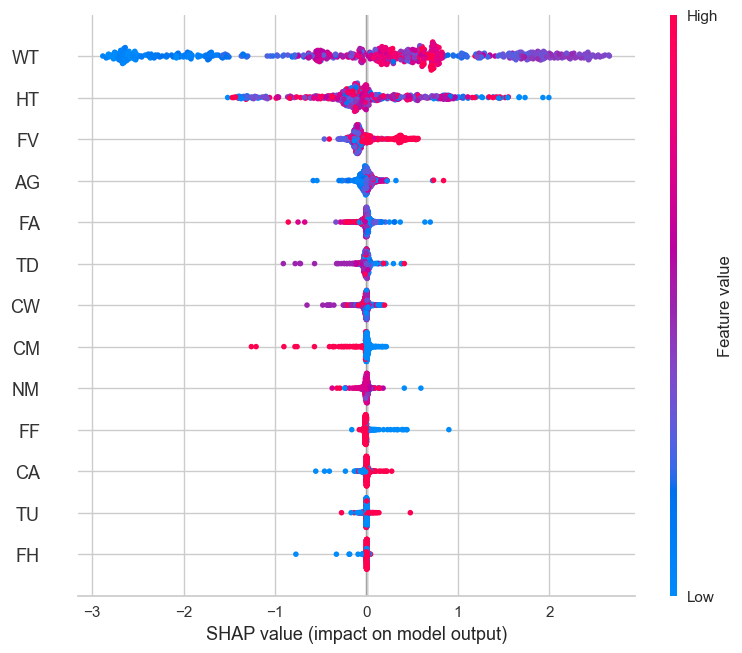

In [163]:
# Visualize the SHAP values for all features
shap.summary_plot(shap_values, X_test)

In [168]:
shap.plots.force(shap_values[15])

In [56]:
shap.plots.force(shap_values[0:100])

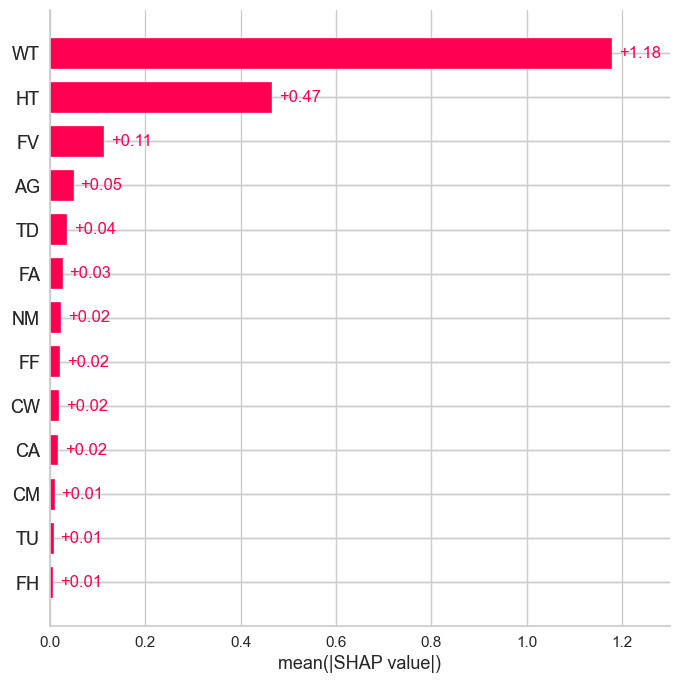

In [57]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

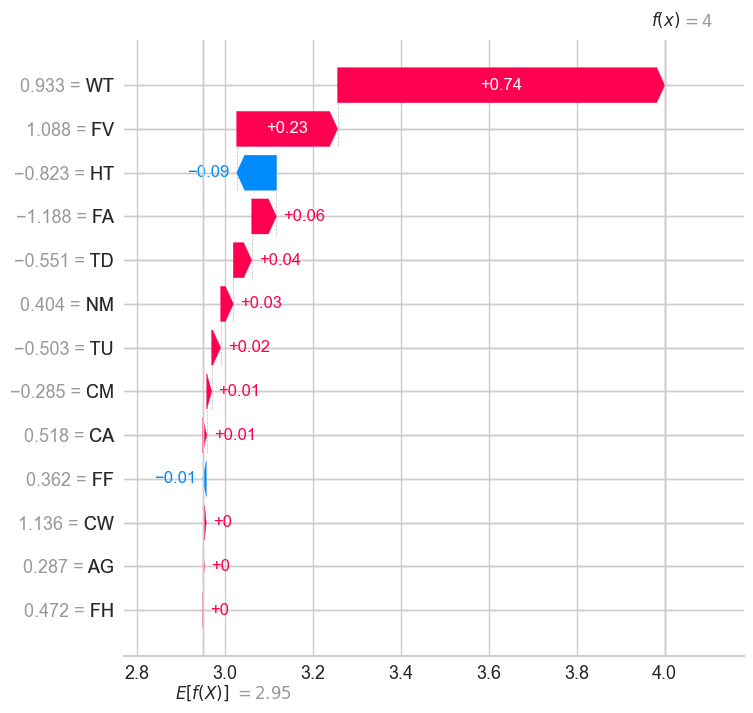

In [58]:
# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1], max_display=len(shap_values.feature_names))

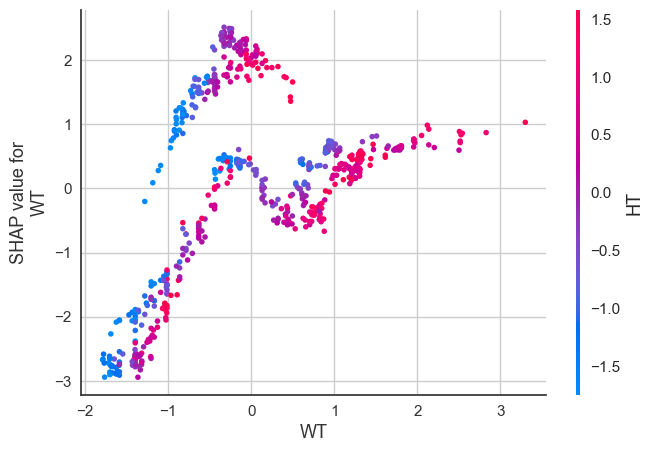

In [59]:
# Visualize the SHAP values for a specific feature
shap.dependence_plot("WT", shap_values.values, X_test)

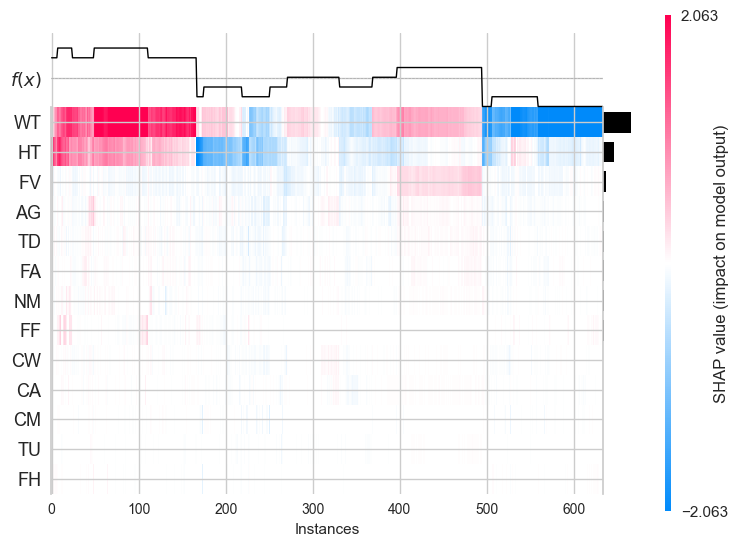

<Axes: xlabel='Instances'>

In [60]:
shap.plots.heatmap(shap_values[:1000], max_display=len(shap_values.feature_names))

## LIME Local  Interpretable Model-agnostic Explanations

In [61]:
#!pip install lime

import lime
import lime.lime_tabular

In [89]:
# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X.values,  # Use the NumPy array representation of X
    feature_names=X.columns.tolist(), # Feature names for interpretability
    class_names=['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I', 'Obesity_Type_II', 
                 'Obesity_Type_III','Overweight_Level_I','Overweight_Level_II' ], # Class names
    mode='classification' # or 'regression' depending on the task
)

In [90]:
# Choose an instance to explain
instance_index = 10 # Example: explain the first instance
instance = X.iloc[instance_index]

In [91]:
# Explain the instance
explanation = explainer.explain_instance(
    instance.values,
    lambda x: final_stacker.predict_proba(pd.DataFrame(x, columns=X.columns)), # Use a lambda function to wrap the prediction
    num_features= 13  # Number of features to show in explanation
)

In [92]:
# Show the explanation
explanation.show_in_notebook(show_table=True)

In [93]:
explanation.as_list()

[('-0.14 < WT <= 0.80', -0.15219064544066296),
 ('HT > 0.72', 0.12977185254876653),
 ('-0.06 < FV <= 1.09', -0.041461487270330485),
 ('FA > 0.77', 0.03994160334723749),
 ('-0.03 < NM <= 0.40', 0.026360491148848378),
 ('TD > 0.56', -0.025921264134130883),
 ('TU <= -0.50', 0.009710088442755706),
 ('-0.24 < AG <= 0.29', 0.0075481252080172095),
 ('CM > -0.29', 0.006735351044172922),
 ('CW > 0.77', 0.00662231335635771),
 ('-1.41 < CA <= 0.52', -0.0036619976567013367),
 ('FH <= 0.47', 0.0),
 ('FF <= 0.36', 0.0)]

In [94]:
explainer2 = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I', 'Obesity_Type_II', 
                 'Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'],  # MODIFIED
    mode='classification'
)

# Choose another instance to explain
instance_index_2 = 20 # explain the 15th instance
instance_2 = X.iloc[instance_index_2]

# Explain the second instance
explanation_2 = explainer2.explain_instance(
    instance_2.values,
    lambda x: final_stacker.predict_proba(pd.DataFrame(x, columns=X.columns)),
    num_features= 13 # Number of features to show in explanation
)

# Show the second explanation
explanation_2.show_in_notebook(show_table=True)
explanation_2.as_list()

[('-0.77 < WT <= -0.13', 0.11622216275067984),
 ('FV <= -0.79', 0.0547770123128642),
 ('FA > 0.70', 0.05259729117586921),
 ('-0.70 < AG <= -0.23', 0.029586066411779768),
 ('-0.77 < HT <= -0.00', -0.029356026417870804),
 ('CM <= -0.29', -0.014424091919819143),
 ('TD > 0.56', -0.009639788833026573),
 ('-0.05 < NM <= 0.40', 0.006282495843226526),
 ('CA <= -1.41', -0.006145445327867653),
 ('-0.73 < CW <= -0.01', 0.004523993625278372),
 ('TU <= -0.50', -0.0023324490833380785),
 ('FH <= 0.47', 0.0),
 ('FF <= 0.36', 0.0)]

In [95]:
# Choose yet another instance to explain
instance_index_3 = 100 # Explain the 100th instance
instance_3 = X.iloc[instance_index_3]

# Explain the third instance
explanation_3 = explainer.explain_instance(
    instance_3.values,
    lambda x: final_stacker.predict_proba(pd.DataFrame(x, columns=X.columns)),
    num_features= 13 # Number of features to show in explanation
)

# Show the third explanation
explanation_3.show_in_notebook(show_table=True)
explanation_3.as_list()

[('WT <= -0.81', 0.1633012270510741),
 ('-0.77 < HT <= -0.01', -0.04725245878934052),
 ('-0.06 < FV <= 1.09', -0.03329228955364426),
 ('FA <= -1.04', -0.022795490345669692),
 ('-0.71 < AG <= -0.24', 0.012639898764822303),
 ('-1.41 < CA <= 0.52', -0.011518313587311849),
 ('NM <= -0.03', 0.0076740793356401835),
 ('CW <= -0.69', -0.007479858974018999),
 ('TD <= -1.08', -0.00680529875006868),
 ('TU <= -0.50', 0.002371978999691525),
 ('CM <= -0.29', -0.0010055186113464756),
 ('FH <= 0.47', 0.0),
 ('FF <= 0.36', 0.0)]

The LIME explanation image is saved at: C:/Users\Shahid Mohammad/OneDrive/Desktop/Research Collaboration/Pijush Sir/Metabolic Disorders/Resultst.png


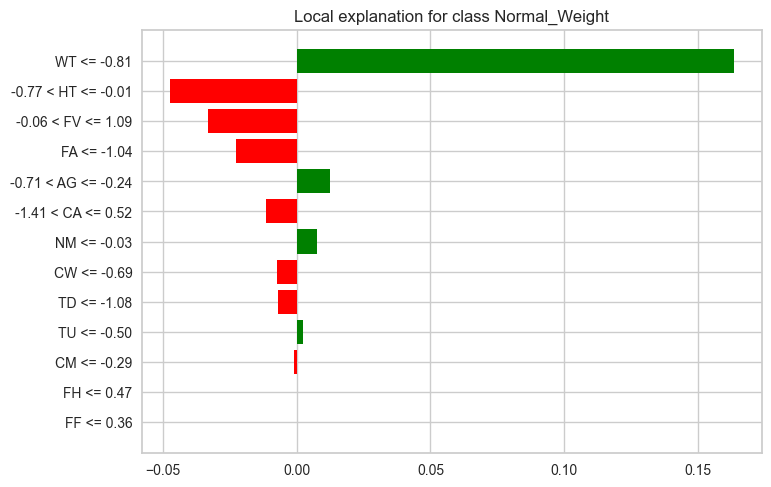

In [159]:
import matplotlib.pyplot as plt

# Visualize the explanation
fig = explanation_3.as_pyplot_figure()

# Save the figure as a PNG or JPEG file
output_path = 'C:/Users\Shahid Mohammad/OneDrive/Desktop/Research Collaboration/Pijush Sir/Metabolic Disorders/Resultst.png'  # You can change the path and format as needed
fig.savefig(output_path, format='png', dpi=300)

# Display the saved image path for download
print(f"The LIME explanation image is saved at: {output_path}")

### End